<a href="https://colab.research.google.com/github/Thasneem-vazim/Depression-detection-with-15-features-with-and-without-using-DR-techniques/blob/main/Experiments_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
np.random.seed(13)
file=pd.read_csv("/content/Copy of Survey (Responses) - Form Responses 1 (2).csv")
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]

y=file["Class"]

In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [4]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x1_train = pca.fit_transform(x_train)
x1_test = pca.transform(x_test)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       1.00      0.86      0.92        14
           2       0.92      1.00      0.96        12
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.93        42
   macro avg       0.90      0.95      0.92        42
weighted avg       0.94      0.93      0.93        42



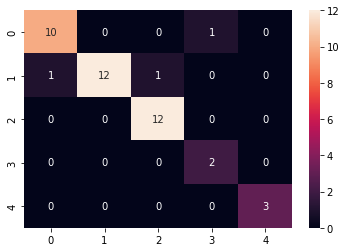

In [5]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x1_train, y_train)
from sklearn.metrics import classification_report,confusion_matrix
y6_predict_test=regressor.predict(x1_test)
cm1=confusion_matrix(y_test,y6_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y6_predict_test))


In [6]:
prediction=regressor.predict(x1_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  92.85714285714286


In [7]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x1_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.86      0.86        14
           2       1.00      0.92      0.96        12
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         3

    accuracy                           0.88        42
   macro avg       0.93      0.84      0.86        42
weighted avg       0.89      0.88      0.88        42



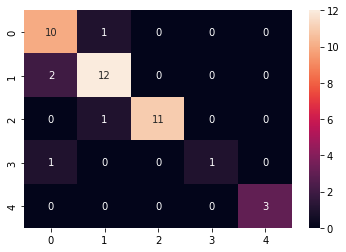

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict_test=SVM.predict(x1_test)
cm1=confusion_matrix(y_test,y1_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y1_predict_test))

In [ ]:
prediction=SVM.predict(x1_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  88.09523809523809


                       precision    recall  f1-score   support

Borderline depression       0.92      1.00      0.96        11
      Mild depression       1.00      0.86      0.92        14
  Moderate depression       0.92      1.00      0.96        12
        No depression       1.00      1.00      1.00         2
    Severe depression       1.00      1.00      1.00         3

             accuracy                           0.95        42
            macro avg       0.97      0.97      0.97        42
         weighted avg       0.96      0.95      0.95        42



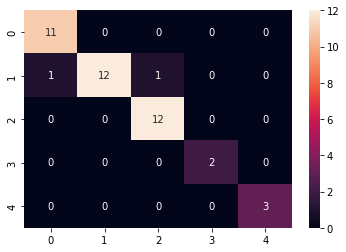

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT=DT.fit(x1_train,y_train)
y4_predict_test=DT.predict(x1_test)
cm4=confusion_matrix(y_test,y4_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y4_predict_test))

In [ ]:
prediction=DT.predict(x1_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  95.23809523809523


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.98        42
   macro avg       0.98      0.99      0.98        42
weighted avg       0.98      0.98      0.98        42



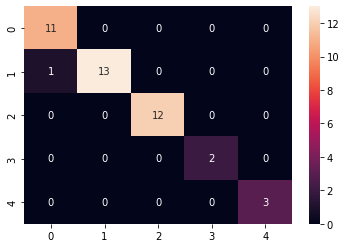

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x1_train, y_train)
y5_predict_test=RF.predict(x1_test)
cm4=confusion_matrix(y_test,y5_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y5_predict_test))

In [ ]:
prediction=RF.predict(x1_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  97.61904761904762


                       precision    recall  f1-score   support

Borderline depression       0.92      1.00      0.96        11
      Mild depression       0.92      0.86      0.89        14
  Moderate depression       0.92      0.92      0.92        12
        No depression       1.00      1.00      1.00         2
    Severe depression       1.00      1.00      1.00         3

             accuracy                           0.93        42
            macro avg       0.95      0.95      0.95        42
         weighted avg       0.93      0.93      0.93        42



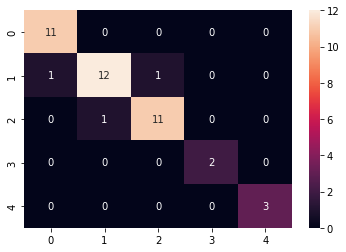

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x1_train, y_train)
y6_pred=knn.predict(x1_test)
cm4=confusion_matrix(y_test,y6_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y6_pred))


In [ ]:
prediction=knn.predict(x1_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  92.85714285714286


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
GradeintBoostClassification = GradientBoostingClassifier(loss='deviance',max_features=1,random_state=0,max_leaf_nodes=None)
GradeintBoostClassification.fit(x_train,y_train)
y_predictionGradient=GradeintBoostClassification.predict(x_test)



In [12]:
prediction=GradeintBoostClassification.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  88.09523809523809


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



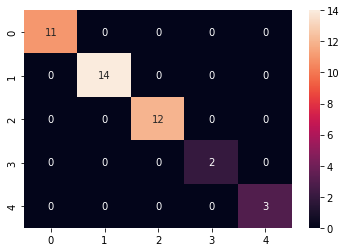

In [9]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'multi:softmax',
 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.01,
 'learning_rate': 0.03,
 'n_estimators':1000,'seed': 42
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x1_train,y_train)

yxg_pred=xgb_clf.predict(x1_test)
cm4=confusion_matrix(y_test,yxg_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,yxg_pred))

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(xgb_clf)
 
# Load the pickled model
xgb_clf_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
xgb_clf_from_pickle.predict(x1_test)

array([4, 0, 1, 0, 1, 1, 0, 4, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 3, 2, 3, 1, 0, 2, 1, 1, 1, 4, 0, 2, 0, 1, 1, 0, 1, 2, 2])

In [10]:
prediction=xgb_clf.predict(x1_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  100.0


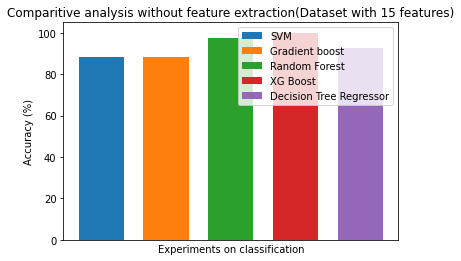

In [14]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Using PCA']
xvals = [88.09]
yvals = [88.095]
zvals = [97.61]
avals = [100]
bvals = [92.85]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.07, label = 'SVM')
plt.bar(x_axis +0.1*2, yvals, width=0.07, label = 'Gradient boost')
plt.bar(x_axis +0.1*3, zvals, width=0.07, label = 'Random Forest')
plt.bar(x_axis +0.1*4, avals, width=0.07, label = 'XG Boost')
plt.bar(x_axis +0.1*5, bvals, width=0.07, label = 'Decision Tree Regressor')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis without feature extraction(Dataset with 15 features)")
plt.legend()
plt.show()